# 02 Neural Network Classification using Pytorch

In [25]:
import torch
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from torch import nn  #neural networks
import requests
print(torch.__version__)

2.7.1+cu118


## 1. Data

In [26]:
n_samples=1000
X,Y=make_circles(n_samples,noise=0.03,random_state=42)
len(X),len(Y)

(1000, 1000)

In [27]:
print(f"X shape: {X.shape}, y shape: {Y.shape}\n ")
# Convert to tensors
print(f"first 5 samples of X:\n {X[:5]},\n \n first 5 samples of y:\n {Y[:5]}")

X shape: (1000, 2), y shape: (1000,)
 
first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]],
 
 first 5 samples of y:
 [1 1 1 1 0]


In [28]:
#making Dataframe of circle data
circles=pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':Y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


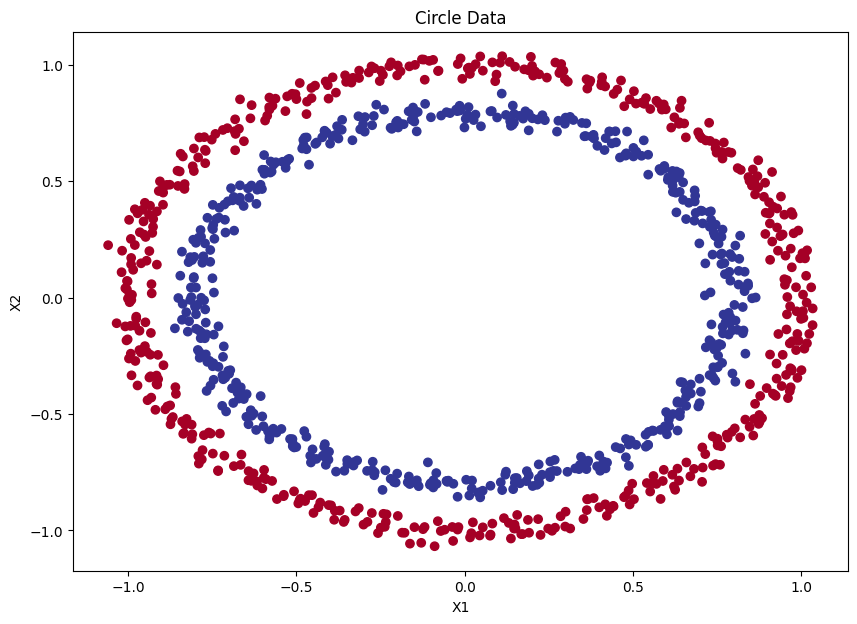

In [29]:
#visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circle Data')
plt.show()

### 1.1 Check inputs and output shapes

In [30]:
X.shape, Y.shape

((1000, 2), (1000,))

In [31]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [32]:
#view the first example of X and Y
print(f"First example of X: {X[0]}\nFirst example of Y: {Y[0]}")
print(f'shape of X: {X[0].shape}, shape of Y: {Y[0].shape}')

First example of X: [0.75424625 0.23148074]
First example of Y: 1
shape of X: (2,), shape of Y: ()


### 1.2 Turn the data into tensors

In [33]:
# turn the data into tensors
X=torch.from_numpy(X).type(torch.float)
Y=torch.from_numpy(Y).type(torch.float)
X[:5],Y[:5],X.dtype,Y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32,
 torch.float32)

In [34]:
#split the data into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(800, 200, 800, 200)

## 2. Building a Model

In [35]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [36]:
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer_1=nn.Linear(in_features=2,out_features=5)#takes 2 features and upscales to 10 features
#         self.layer_2=nn.Linear(in_features=5,out_features=7)#takes 10 features from previous layer and upscales to 25 features
#         self.layer_3=nn.Linear(in_features=7,out_features=1)#takes 25 features from previous layer and downscales to 1 feature (binary classification)

    
#     def forward(self,x):
#         return self.layer_3(self.layer_2(self.layer_1(x)))
    
# model_0=CircleModelV0().to(device=device)
# model_0

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),  # input layer
    nn.Linear(in_features=5,out_features=7),  # hidden layer
    nn.Linear(in_features=7,out_features=1)   # output layer
).to(device=device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=7, bias=True)
  (2): Linear(in_features=7, out_features=1, bias=True)
)

In [37]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140],
                      [-0.2060, -0.0524, -0.1816,  0.2967, -0.3530],
                      [-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
                      [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452],
                      [ 0.2764,  0.0697,  0.3613,  0.0489, -0.1410],
                      [ 0.1202, -0.1213,  0.1882,  0.3993,  0.2585],
                      [-0.1955,  0.2582,  0.0800,  0.2271, -0.2726]], device='cuda:0')),
             ('1.bias',
              tensor([-0.4427, -0.1728, -0.3430,  0.3670,  0.1288,  0.1852,  0.1414],

In [38]:
with torch.inference_mode():
    untrained_preds=model_0(X_test.to(device))
    print(f"Untrained model first 10 predictions:\n{untrained_preds[:10]},\n\nShape: {untrained_preds[:10].shape}, \n\nlength: {len(untrained_preds)},")

Untrained model first 10 predictions:
tensor([[0.0562],
        [0.0499],
        [0.1267],
        [0.0360],
        [0.2124],
        [0.2079],
        [0.1222],
        [0.1594],
        [0.1230],
        [0.0504]], device='cuda:0'),

Shape: torch.Size([10, 1]), 

length: 200,


### 2.1 Setup Loss function and Optimizer

In [39]:
loss_fn=nn.BCEWithLogitsLoss() #binary cross entropy with logits loss it has sigmoid activation function built in
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1) #stochastic gradient descent optimizer

In [40]:
# Calculate the Accuracy- out of 100 examples, how many are correct?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

## 3. Train Model

### 3.1 Going from raw logits(Model Output, Inputs to Activation function)->prediction probability(Output of Activation function)->prediction labels(Target Labels)

In [41]:
model_0.eval()
with torch.inference_mode():
    y_logits=model_0(X_test.to(device))
    print(f"First 10 logits:\n{y_logits[:10]} \n")
    Y_preds_probs=torch.sigmoid(y_logits)
    print(f"First 10 prediction probabilities:\n{Y_preds_probs[:10]} \n")
    Y_preds=torch.round(Y_preds_probs)
    print(f"First 10 predictions:\n{Y_preds[:10]} \n")

    print(torch.eq(Y_preds.squeeze(),Y_test.to(device)).sum().item())

First 10 logits:
tensor([[0.0562],
        [0.0499],
        [0.1267],
        [0.0360],
        [0.2124],
        [0.2079],
        [0.1222],
        [0.1594],
        [0.1230],
        [0.0504]], device='cuda:0') 

First 10 prediction probabilities:
tensor([[0.5140],
        [0.5125],
        [0.5316],
        [0.5090],
        [0.5529],
        [0.5518],
        [0.5305],
        [0.5398],
        [0.5307],
        [0.5126]], device='cuda:0') 

First 10 predictions:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0') 

100


### 3.2 Training and Testing loop

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)
for epoch in range(epochs):
    #training the model
    #set the model to training mode
    model_0.train()
    #forward pass
    Y_logits=model_0(X_train).squeeze()
    Y_preds=torch.round(torch.sigmoid(Y_logits))
    #calculating the loss and accuracy
    loss=loss_fn(Y_logits,Y_train)
    acc=accuracy_fn(y_true=Y_train,y_pred=Y_preds)
    #optimizer zero grad
    optimizer.zero_grad()
    #loass Backward pass
    loss.backward()
    #optimizer step
    optimizer.step()
    #testing the model
    #set the model to evaluation mode
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits=model_0(X_test.to(device)).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))
        #calculating the loss and accuracy
        test_loss=loss_fn(test_logits,Y_test)
        test_acc=accuracy_fn(y_true=Y_test,y_pred=test_preds)
        if epoch % 10 == 9 or epoch == 0:
            #print the loss and accuracy
            print(f"Epoch: {epoch+1} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 1 | Train Loss: 0.69617 | Train Acc: 50.00% | Test Loss: 0.69387 | Test Acc: 50.00%
Epoch: 10 | Train Loss: 0.69442 | Train Acc: 53.62% | Test Loss: 0.69235 | Test Acc: 57.50%
Epoch: 20 | Train Loss: 0.69397 | Train Acc: 51.00% | Test Loss: 0.69203 | Test Acc: 53.00%
Epoch: 30 | Train Loss: 0.69382 | Train Acc: 50.00% | Test Loss: 0.69200 | Test Acc: 53.50%
Epoch: 40 | Train Loss: 0.69373 | Train Acc: 50.00% | Test Loss: 0.69204 | Test Acc: 54.00%
Epoch: 50 | Train Loss: 0.69366 | Train Acc: 50.00% | Test Loss: 0.69209 | Test Acc: 53.50%
Epoch: 60 | Train Loss: 0.69360 | Train Acc: 49.75% | Test Loss: 0.69215 | Test Acc: 53.00%
Epoch: 70 | Train Loss: 0.69355 | Train Acc: 49.75% | Test Loss: 0.69222 | Test Acc: 53.50%
Epoch: 80 | Train Loss: 0.69351 | Train Acc: 49.25% | Test Loss: 0.69228 | Test Acc: 53.50%
Epoch: 90 | Train Loss: 0.69346 | Train Acc: 49.62% | Test Loss: 0.69234 | Test Acc: 54.00%
Epoch: 100 | Train Loss: 0.69343 | Train Acc: 49.50% | Test Loss: 0.69240 | Test 

## 4. Make Predictions and Evaluate the Model

In [43]:
#make predictions and evaluating the model
#Download helper function ffrom Learn pytorch repo (if its not already)
if Path('helper_functions.py').is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    response = requests.get(url)
    with open('helper_functions.py', 'wb') as f:
        f.write(response.content)
    print("Download complete.")

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download.


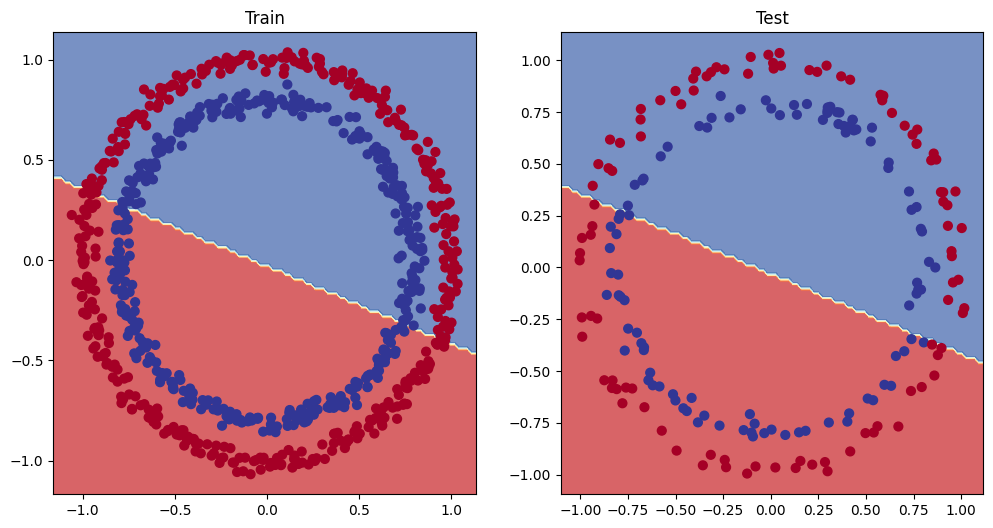

In [ ]:
# plotting the predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,Y_test)